Do you think you may have the data you need to tackle the desired question?: We seem to have robust data to predict life expectancy.

Have you identified the required target value?: Life expectancy.

Do you have potentially useful features?: Yes

Do you have any fundamental issues with the data?: Missing values, some which we will put the country's mean value in for it, some which we will drop the columns.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df= pd.read_csv('Life_Expectancy_Data.csv')

In [3]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
[x for x in df.columns if x.endswith(' ') or x.startswith(' ')]

['Life expectancy ',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Diphtheria ',
 ' HIV/AIDS',
 ' thinness  1-19 years',
 ' thinness 5-9 years']

In [7]:
df.columns = df.columns.str.strip()

In [8]:
[x for x in df.columns if x.endswith(' ') or x.startswith(' ')]

[]

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life expectancy                  2928 non-null   float64
 4   adult mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   hepatitis b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  polio               

Our column of interest is 3, life expectancy. Everything is a float or int except for country. We have the column names normalized with no leading or trailing spaces or inconsistent capitalization.

In [11]:
df.sort_values(by='country')
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

count          %
country                              0   0.000000
year                                 0   0.000000
status                               0   0.000000
infant deaths                        0   0.000000
percentage expenditure               0   0.000000
measles                              0   0.000000
hiv/aids                             0   0.000000
under-five deaths                    0   0.000000
life expectancy                     10   0.340368
adult mortality                     10   0.340368
polio                               19   0.646698
diphtheria                          19   0.646698
thinness 5-9 years                  34   1.157250
thinness  1-19 years                34   1.157250
bmi                                 34   1.157250
schooling                          163   5.547992
income composition of resources    167   5.684139
alcohol                            194   6.603131
total expenditure                  226   7.692308
gdp                                448  15.248468
hepatitis b                        553  18.822328
population                         652  22.191967

Some preliminary visualization of the variables, before dropping None or filling them in.

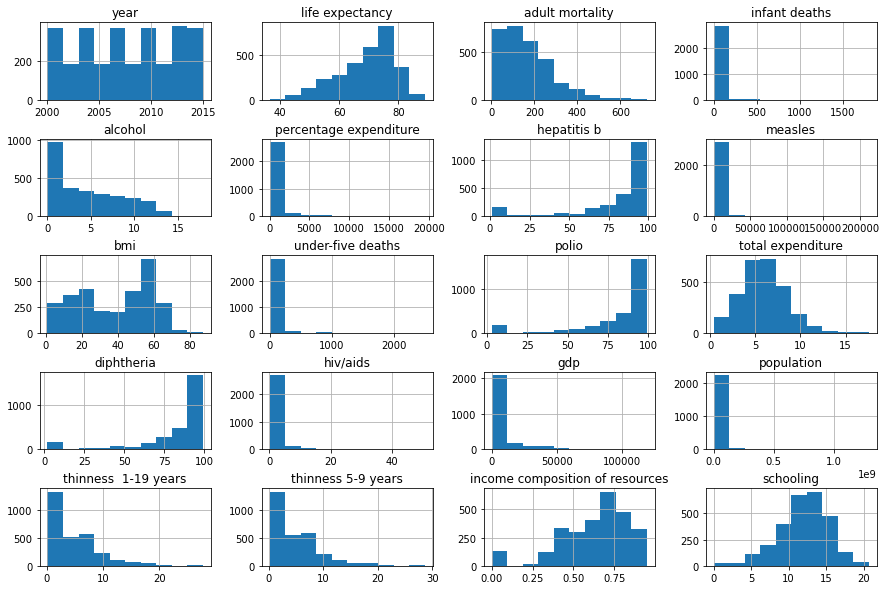

In [12]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Measles seems to be clustered towards zero, same with hiv/aids, and infant deaths. 

<AxesSubplot:>

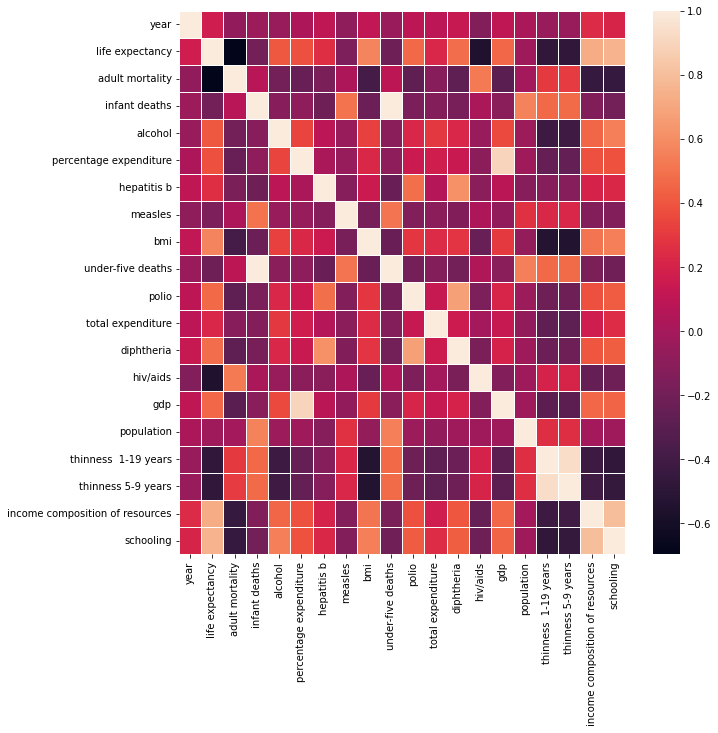

In [13]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, linewidths=.5, ax=ax)

I see that infant deaths and under-five deaths are correlated, which makes sense. As well as thinness for overlapping age groups and GDP and percentage expenditure. BMI is inversely correlated with thinness. Mortality and AIDS are inversely correlated with Life Expectancy. All to be expected.

In [14]:
df.isna()

country   year  status  life expectancy  adult mortality  infant deaths  \
0       False  False   False            False            False          False   
1       False  False   False            False            False          False   
2       False  False   False            False            False          False   
3       False  False   False            False            False          False   
4       False  False   False            False            False          False   
...       ...    ...     ...              ...              ...            ...   
2933    False  False   False            False            False          False   
2934    False  False   False            False            False          False   
2935    False  False   False            False            False          False   
2936    False  False   False            False            False          False   
2937    False  False   False            False            False          False   

      alcohol  percentage expenditure  hepatitis b  measles  ...  polio  \
0       False                   False        False    False  ...  False   
1       False                   False        False    False  ...  False   
2       False                   False        False    False  ...  False   
3       False                   False        False    False  ...  False   
4       False                   False        False    False  ...  False   
...       ...                     ...          ...      ...  ...    ...   
2933    False                   False        False    False  ...  False   
2934    False                   False        False    False  ...  False   
2935    False                   False        False    False  ...  False   
2936    False                   False        False    False  ...  False   
2937    False                   False        False    False  ...  False   

      total expenditure  diphtheria  hiv/aids    gdp  population  \
0                 False       False     False  False       False   
1                 False       False     False  False       False   
2                 False       False     False  False       False   
3                 False       False     False  False       False   
4                 False       False     False  False       False   
...                 ...         ...       ...    ...         ...   
2933              False       False     False  False       False   
2934              False       False     False  False       False   
2935              False       False     False  False       False   
2936              False       False     False  False       False   
2937              False       False     False  False       False   

      thinness  1-19 years  thinness 5-9 years  \
0                    False               False   
1                    False               False   
2                    False               False   
3                    False               False   
4                    False               False   
...                    ...                 ...   
2933                 False               False   
2934                 False               False   
2935                 False               False   
2936                 False               False   
2937                 False               False   

      income composition of resources  schooling  
0                               False      False  
1                               False      False  
2                               False      False  
3                               False      False  
4                               False      False  
...                               ...        ...  
2933                            False      False  
2934                            False      False  
2935                            False      False  
2936                            False      False  
2937                            False      False  

[2938 rows x 22 columns]

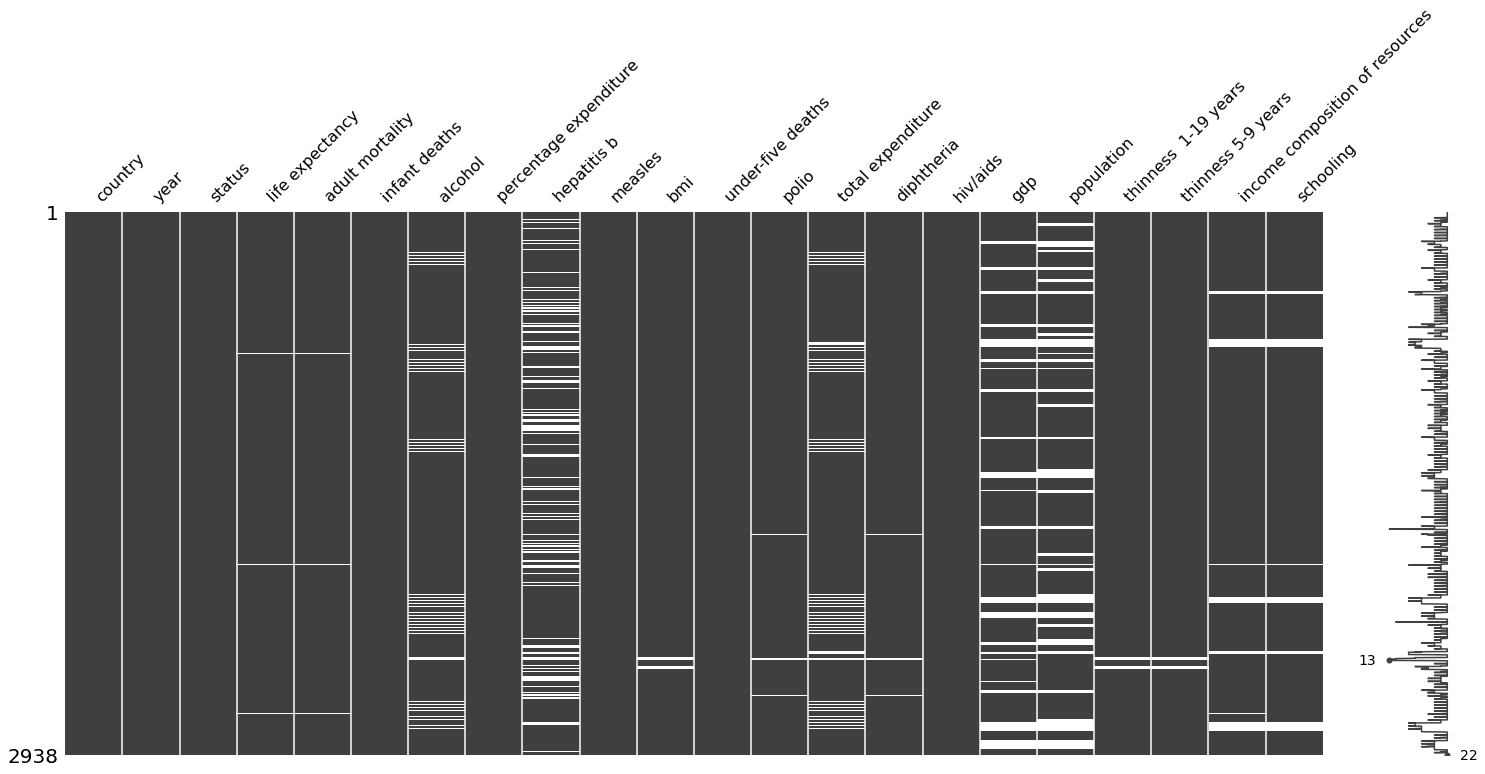

In [15]:
msno.matrix(df)
plt.show()

Doesn't make sense to fill in population with an overall average because countries are all different. Same with other features - I think if I'm to fill in with a mean, it will be the mean of that feature only for that country.

<AxesSubplot:>

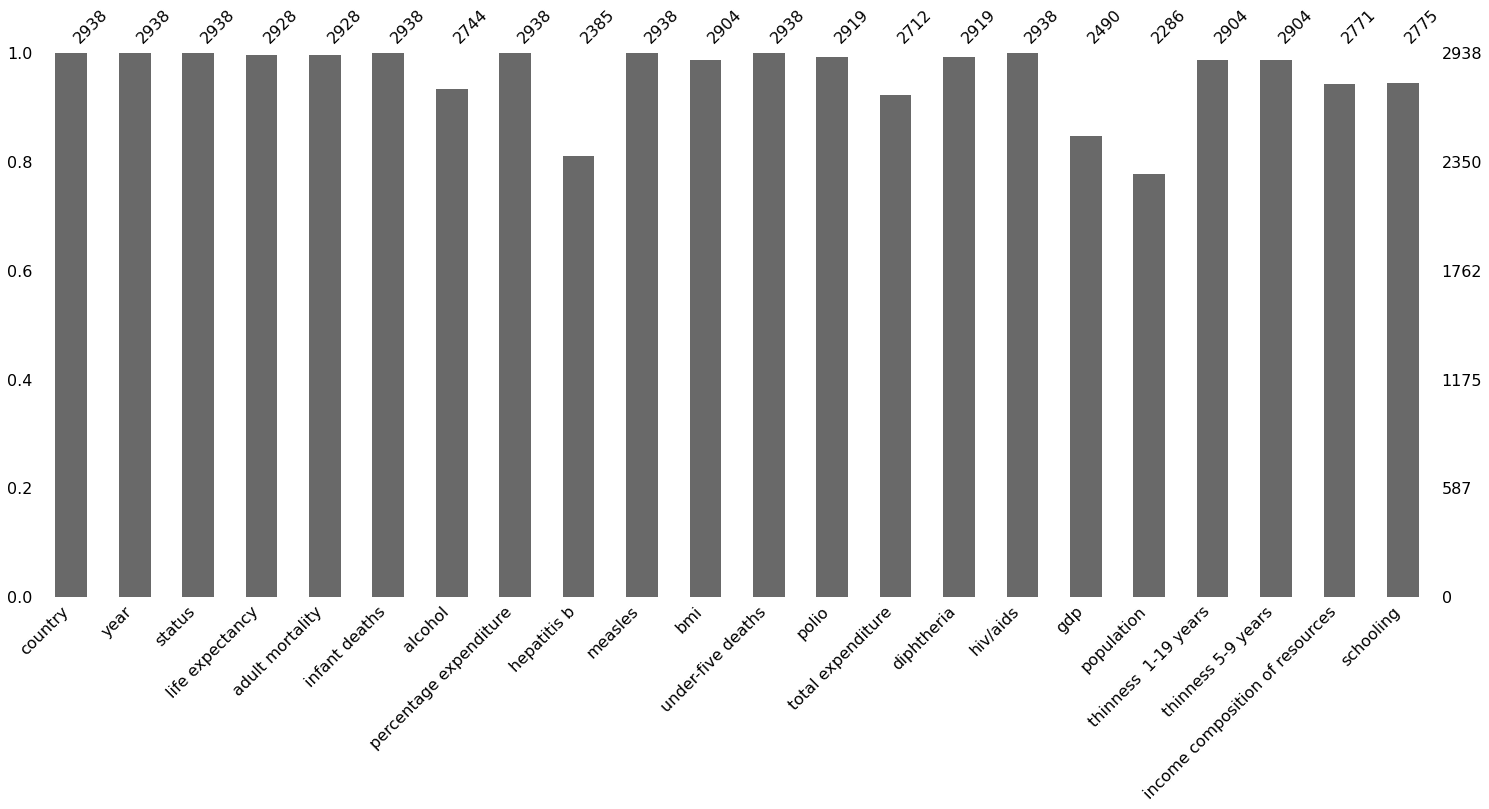

In [16]:
msno.bar(df)

<AxesSubplot:>

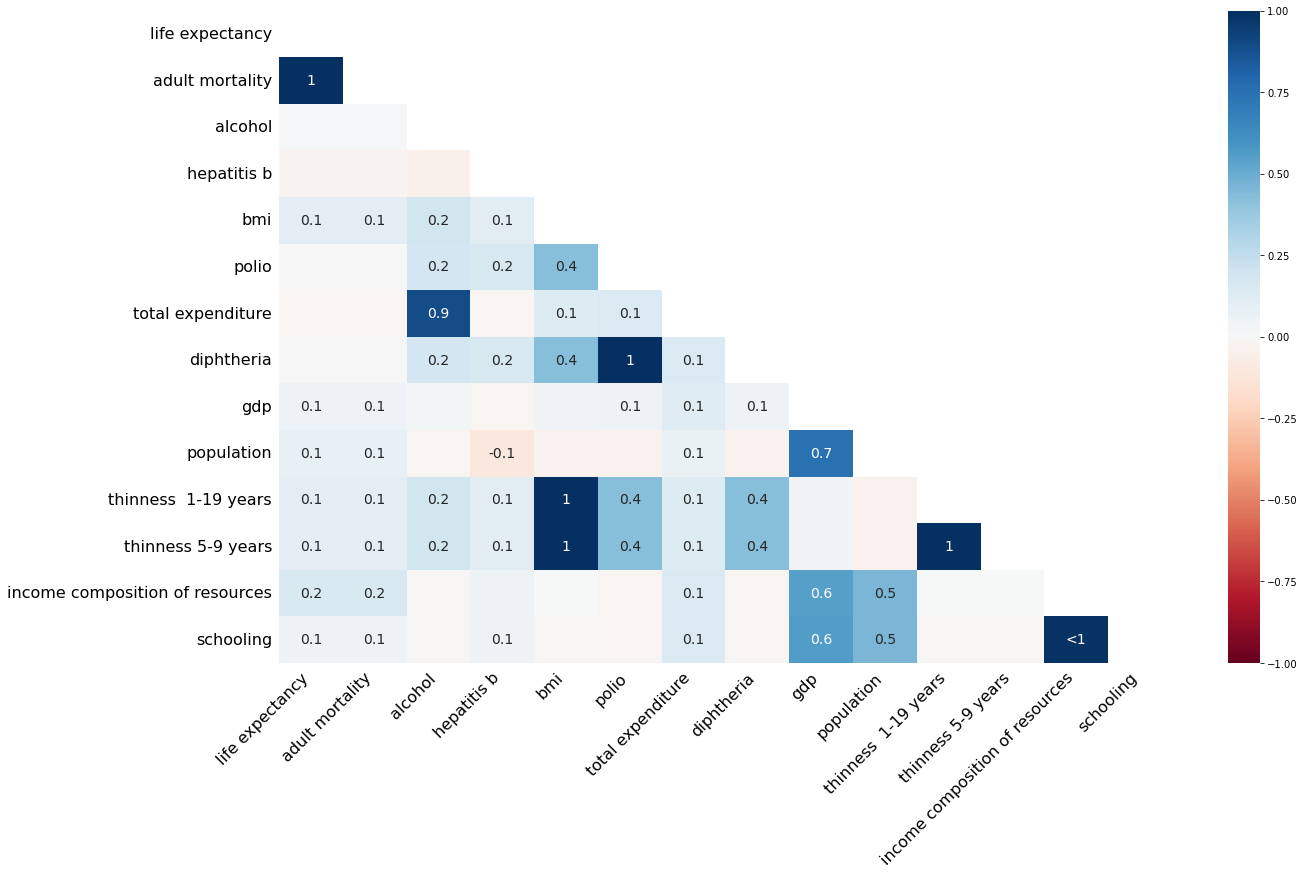

In [17]:
msno.heatmap(df)

<AxesSubplot:>

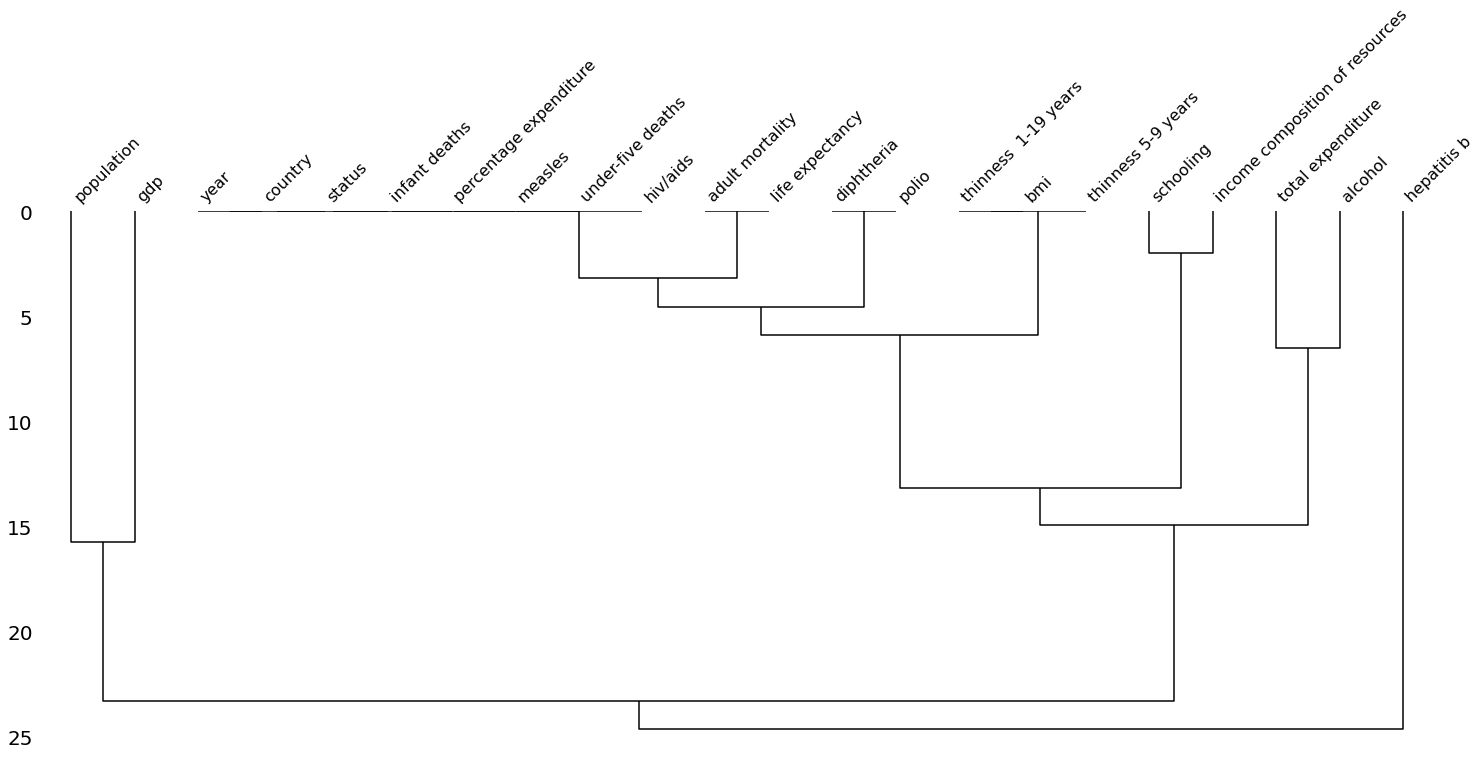

In [18]:
msno.dendrogram(df)

Some of the missing values are correlated, but in an expected way, like thinness and BMI, if one is missing it makes sense for another to be missing. You couldn't find GDP without population, similarly. 

At first, I wanted to drop the top three columns that had the most missing data (gdp, hepatitis b, and poopulation) entirely, because with so much missing data, they wouldn't be useful. I wanted to, with the other columns with missing data, fill in the missing values with the mean of that country. However, this wouldn't be worth the amount of code necessary to do this (for each column with missing values and for each of the many countries). It would have been something like df[df.country=='Afghanistan']['alcohol'].fillna(df[df.country=='Afghanistan']['alcohol'].mean(), inplace=True).

Overall, the missing data is not that much compared with all of the data, and we can safely drop all of the missing data rows completely.

In [19]:
df = df.dropna() 


**EDA**

How is life expectancy currently computed or recorded? 

https://cdn.who.int/media/docs/default-source/gho-documents/global-health-estimates/ghe2019_life-table-methods.pdf?sfvrsn=c433c229_5

"Not all WHO Member States have complete Vital Registration (VR) systems recording all deaths occurring in a certain calendar year with detailed information on age and sex of the deceased, and where such systems do exist, the completeness and quality of data vary across Member States." There are VR and non-VR countries: "VR countries 77 countries and territories for which the WHO Mortality Database held
mortality data from vital registration (VR) systems for 75% or more of years
since 1990.
Non-VR countries The remaining countries and territories where the most up-to-date estimates
of mortality rates for child under 15 years of age from UN-IGME and for older
age groups based on the GBD model life table systems9,10 were used to
construct annual life tables." "Estimated adult mortality for non-VR countries
For countries where death registration data are not available for at least 75% of the years in the period
1990-2019 available, adult mortality rates and the associated uncertainty for ages above 15 years were
based on modelling. It draws on a wide range of data sources including available death registration data
such as the Disease Surveillance Points (DSP) in China19,20 and the Sample Registration System (SRS) in
India21,22, census, nationally representative household surveys, and sibling survival history data. The tool
for estimating the country-age-sex-specific mortality rates for this group of countries is the GBD model
life table systems, 9,16 which are a further development of the modified logit model life table previously
used for WHO life table estimation in early 2000s"

Relationships between each variable and life expectancy

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          1649 non-null   object 
 1   year                             1649 non-null   int64  
 2   status                           1649 non-null   object 
 3   life expectancy                  1649 non-null   float64
 4   adult mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   hepatitis b                      1649 non-null   float64
 9   measles                          1649 non-null   int64  
 10  bmi                              1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  polio               

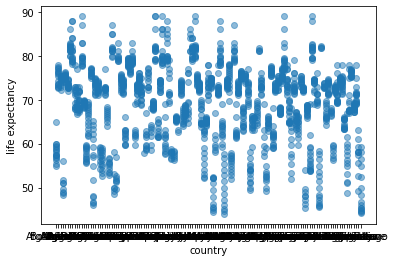

In [33]:
plt.scatter(df['country'], df['life expectancy'], alpha=0.5)
plt.xlabel('country')
plt.ylabel('life expectancy')
plt.show()

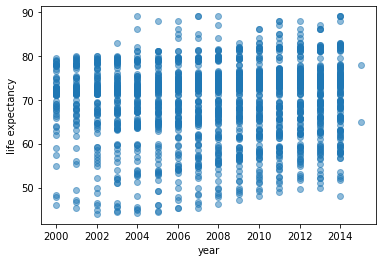

In [34]:
plt.scatter(df['year'], df['life expectancy'], alpha=0.5)
plt.xlabel('year')
plt.ylabel('life expectancy')
plt.show()

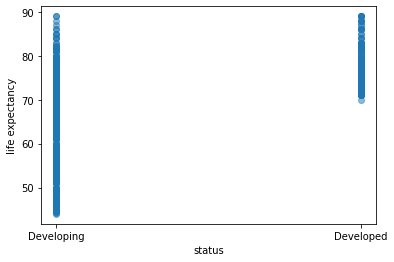

In [53]:
plt.scatter(df['status'], df['life expectancy'], alpha=0.5)
plt.xlabel('status')
plt.ylabel('life expectancy')
plt.show()

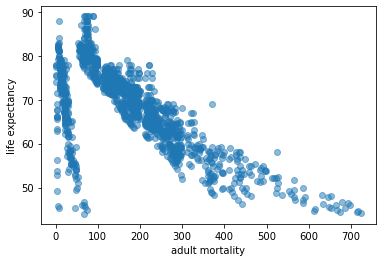

In [54]:
plt.scatter(df['adult mortality'], df['life expectancy'], alpha=0.5)
plt.xlabel('adult mortality')
plt.ylabel('life expectancy')
plt.show()

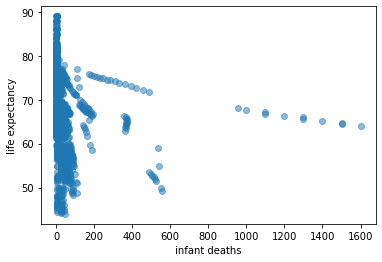

In [55]:
plt.scatter(df['infant deaths'], df['life expectancy'], alpha=0.5)
plt.xlabel('infant deaths')
plt.ylabel('life expectancy')
plt.show()

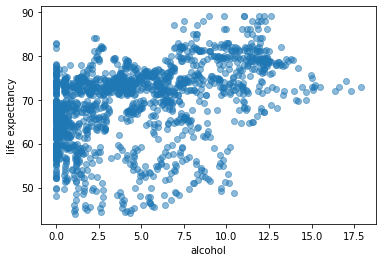

In [56]:
plt.scatter(df['alcohol'], df['life expectancy'], alpha=0.5)
plt.xlabel('alcohol')
plt.ylabel('life expectancy')
plt.show()

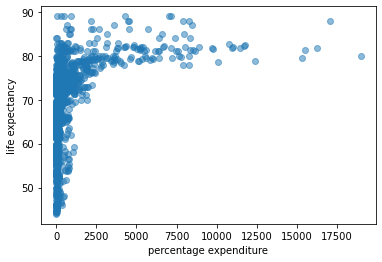

In [58]:
plt.scatter(df['percentage expenditure'], df['life expectancy'], alpha=0.5)
plt.xlabel('percentage expenditure')
plt.ylabel('life expectancy')
plt.show()

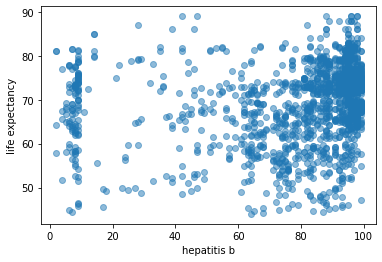

In [73]:
plt.scatter(df['hepatitis b'], df['life expectancy'], alpha=0.5)
plt.xlabel('hepatitis b')
plt.ylabel('life expectancy')
plt.show()

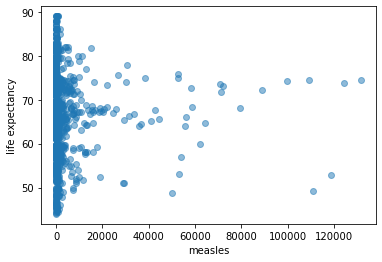

In [72]:
plt.scatter(df['measles'], df['life expectancy'], alpha=0.5)
plt.xlabel('measles')
plt.ylabel('life expectancy')
plt.show()

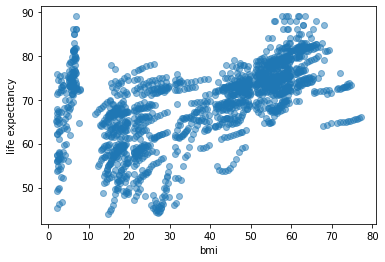

In [71]:
plt.scatter(df['bmi'], df['life expectancy'], alpha=0.5)
plt.xlabel('bmi')
plt.ylabel('life expectancy')
plt.show()

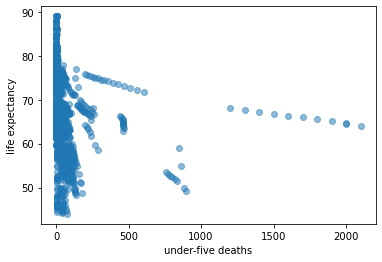

In [70]:
plt.scatter(df['under-five deaths'], df['life expectancy'], alpha=0.5)
plt.xlabel('under-five deaths')
plt.ylabel('life expectancy')
plt.show()

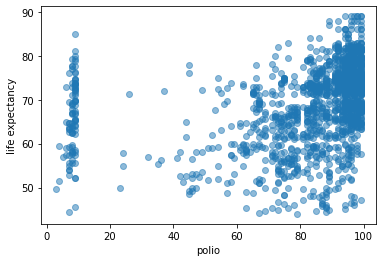

In [69]:
plt.scatter(df['polio'], df['life expectancy'], alpha=0.5)
plt.xlabel('polio')
plt.ylabel('life expectancy')
plt.show()

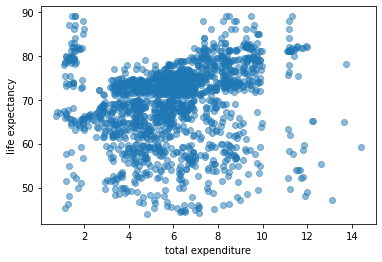

In [68]:
plt.scatter(df['total expenditure'], df['life expectancy'], alpha=0.5)
plt.xlabel('total expenditure')
plt.ylabel('life expectancy')
plt.show()

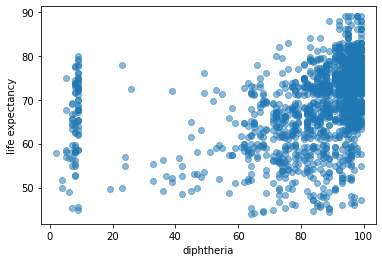

In [67]:
plt.scatter(df['diphtheria'], df['life expectancy'], alpha=0.5)
plt.xlabel('diphtheria')
plt.ylabel('life expectancy')
plt.show()

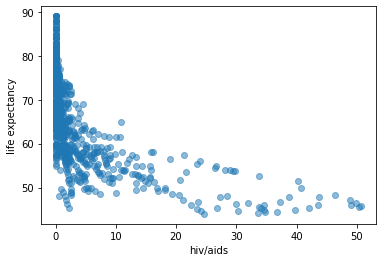

In [66]:
plt.scatter(df['hiv/aids'], df['life expectancy'], alpha=0.5)
plt.xlabel('hiv/aids')
plt.ylabel('life expectancy')
plt.show()

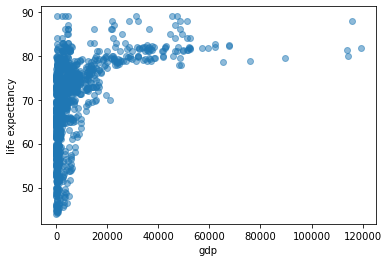

In [65]:
plt.scatter(df['gdp'], df['life expectancy'], alpha=0.5)
plt.xlabel('gdp')
plt.ylabel('life expectancy')
plt.show()

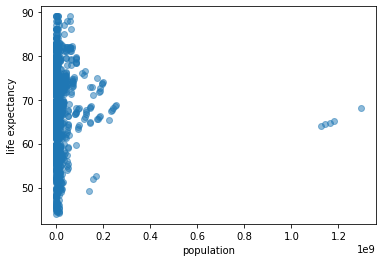

In [64]:
plt.scatter(df['population'], df['life expectancy'], alpha=0.5)
plt.xlabel('population')
plt.ylabel('life expectancy')
plt.show()

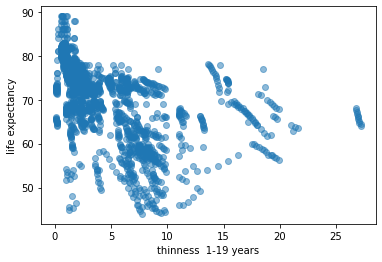

In [63]:
plt.scatter(df['thinness  1-19 years'], df['life expectancy'], alpha=0.5)
plt.xlabel('thinness  1-19 years')
plt.ylabel('life expectancy')
plt.show()

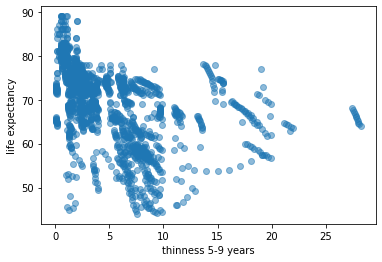

In [61]:
plt.scatter(df['thinness 5-9 years'], df['life expectancy'], alpha=0.5)
plt.xlabel('thinness 5-9 years')
plt.ylabel('life expectancy')
plt.show()

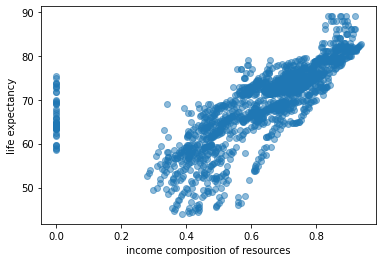

In [60]:
plt.scatter(df['income composition of resources'], df['life expectancy'], alpha=0.5)
plt.xlabel('income composition of resources')
plt.ylabel('life expectancy')
plt.show()

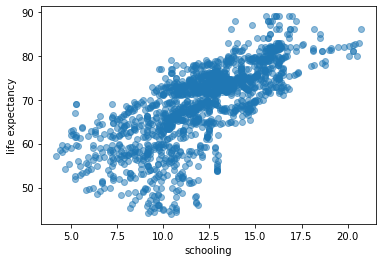

In [59]:
plt.scatter(df['schooling'], df['life expectancy'], alpha=0.5)
plt.xlabel('schooling')
plt.ylabel('life expectancy')
plt.show()

We see that some variables are correlated with life expectancy, let's return to their correlation with each other. - As done in the last step, I see that infant deaths and under-five deaths are correlated, which makes sense. As well as thinness for overlapping age groups and GDP and percentage expenditure. BMI is inversely correlated with thinness. Mortality and AIDS are inversely correlated with Life Expectancy. Not all of these variables will be necessary to predict life expectancy because of intervariable correlation.

<AxesSubplot:>

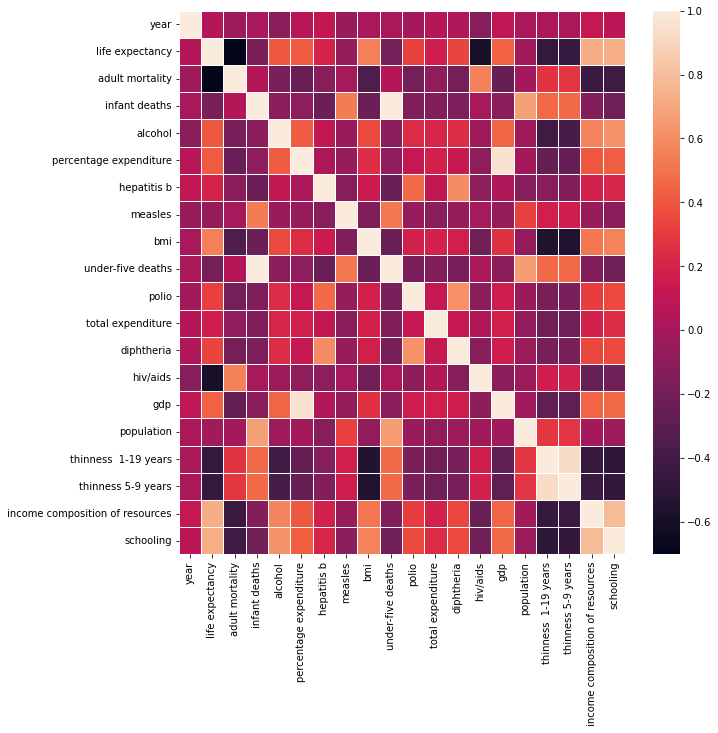

In [35]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, linewidths=.5, ax=ax)

In [50]:
X = df.loc[:, df.columns != 'life expectancy']
y = pd.DataFrame(df['life expectancy'])

In [51]:
X.columns

Index(['country', 'year', 'status', 'adult mortality', 'infant deaths',
       'alcohol', 'percentage expenditure', 'hepatitis b', 'measles', 'bmi',
       'under-five deaths', 'polio', 'total expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

In [52]:
y.columns

Index(['life expectancy'], dtype='object')

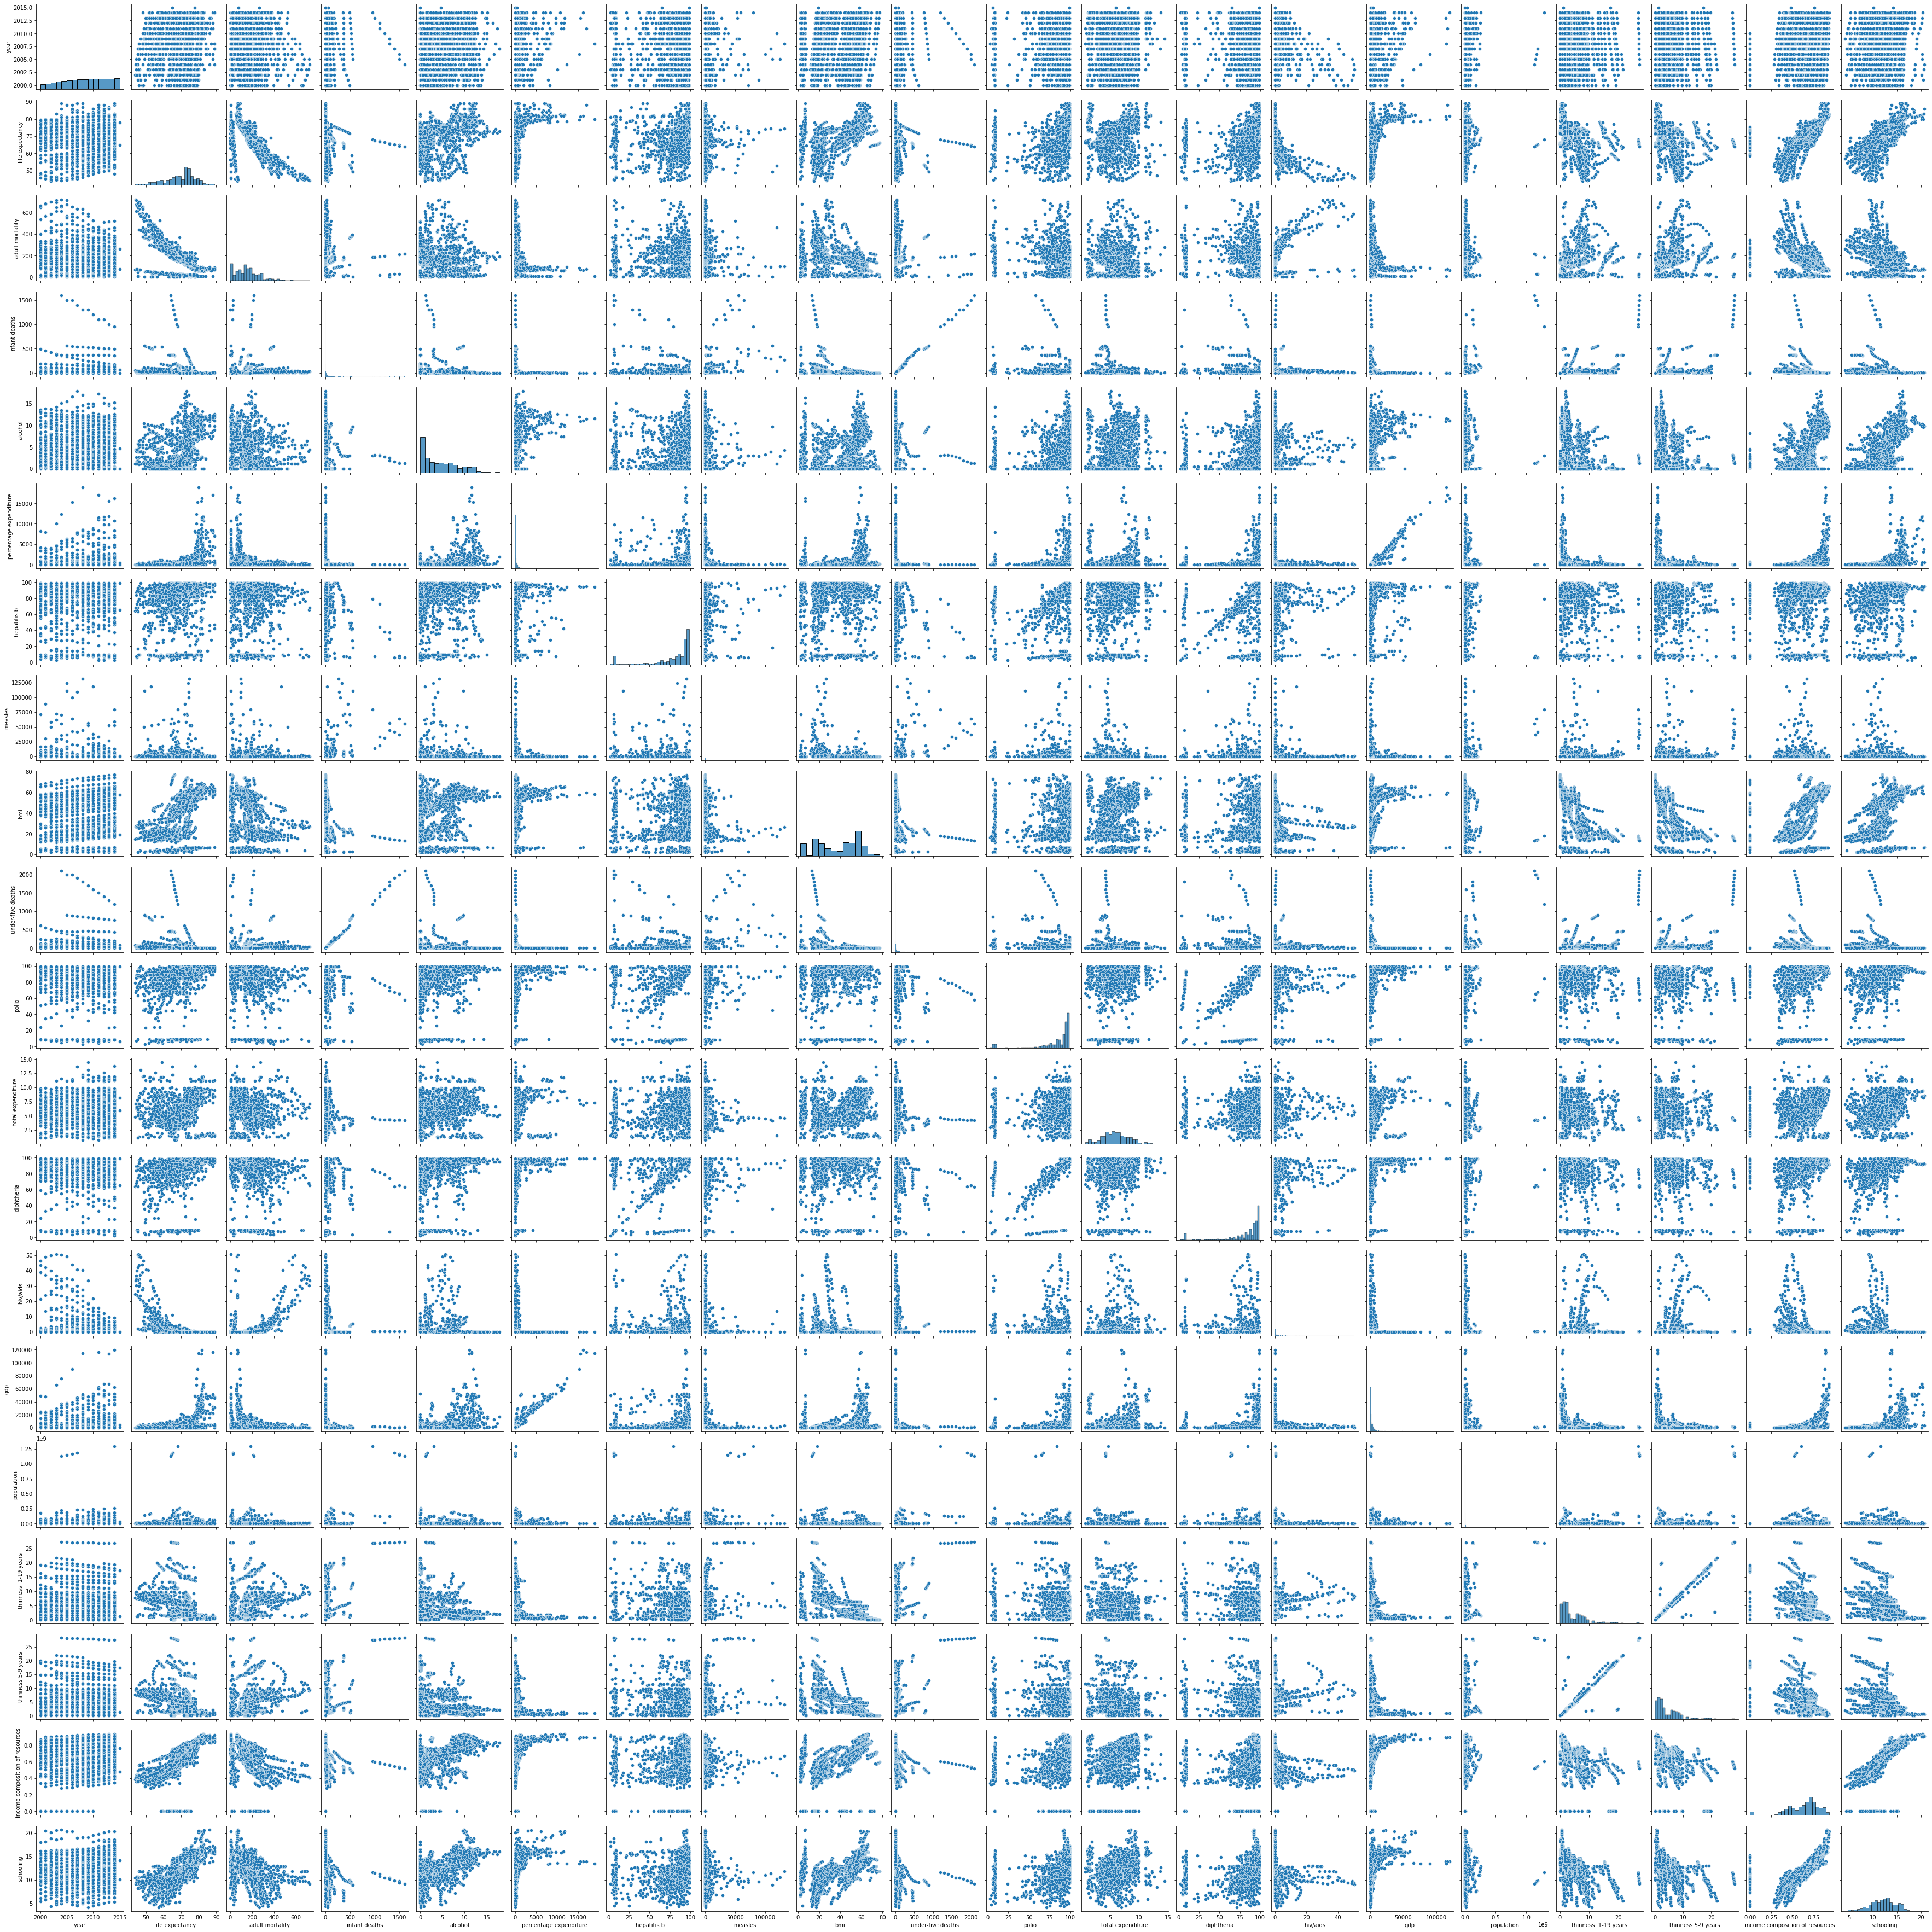

In [74]:
sns.pairplot(df,  palette='Set1')
plt.show()